In [7]:
# 原始方案：带参数beta求解
from Net import Poisson_DNN
import torch
from testProblem import Poisson_data,plot_3D
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import cm  
from torch.autograd.functional import hessian
np.random.seed(123)
torch.manual_seed(123)

# 系统参数
dim = 2
region = [(-1,1),(-1,1)]

# 网络结构参数
width = 20
blocks = 3

# 训练参数
bc = 'train'
loss_term = 'mix'
beta = 100
epochs = 201
lr = 0.01
sample_num_int = 1000
sample_num_partial = 100
show_interval = 50


model = Poisson_DNN(width=width,blocks=blocks,data=Poisson_data,bc=bc)
optimizer_lbfgs = torch.optim.LBFGS(
        model.parameters(),
        history_size=50,
        tolerance_change=1.0 * np.finfo(float).eps,
        line_search_fn="strong_wolfe",
        )
optimizer_adam = torch.optim.Adam(model.parameters(),lr=lr)
loss_path = model.train(optimizer=optimizer_lbfgs,epochs=epochs,beta=beta,loss_term=loss_term,show_interval=show_interval,sample_num_int=sample_num_int,sample_num_partial=sample_num_partial)

Trainning Start!
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 0 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=2830   loss_int= 2090   loss_partial=7.402 
Test loss=2.067
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 50 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.111   loss_int= 0.1009   loss_partial=0.0001012 
Test loss=0.00837
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 100 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.04067   loss_int= 0.03741   loss_partial=3.262e-05 
Test loss=0.004606
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 150 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.02555   loss_int= 0.02264   loss_partial=2.915e-05 
Test loss=0.003889
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 200 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.018   loss_int= 0.01647   loss_partial=1.527e-05 
Test loss=0.002911
Training done! Time cost: 120.791


In [9]:
# 新方案：第一步优化（不够好）
from testProblem import Poisson_data,plot_3D
np.random.seed(123)
torch.manual_seed(123)
model_bc = Poisson_DNN(width=30,blocks=2,data=Poisson_data,bc='train')
optimizer_lbfgs = torch.optim.LBFGS(
        model_bc.parameters(),
        history_size=50,
        tolerance_change=1.0 * np.finfo(float).eps,
        line_search_fn="strong_wolfe",
        )
loss_path_bc = model_bc.train(optimizer=optimizer_lbfgs,epochs=301,beta=1000,loss_term='bc',show_interval=50,sample_num_int=100,sample_num_partial=1000)

Trainning Start!
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 0 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=8822   loss_int= 2086   loss_partial=6.736 
Test loss=1.961
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 50 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=5.692e+05   loss_int= 5.692e+05   loss_partial=2.858e-05 
Test loss=3.342
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 100 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=4.167e+05   loss_int= 4.167e+05   loss_partial=4.159e-06 
Test loss=4.085
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 150 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=4.867e+05   loss_int= 4.867e+05   loss_partial=2.723e-06 
Test loss=4.262
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 200 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=4.867e+05   loss_int= 4.867e+05   loss_partial=2.723e-06 
Test loss=4.262
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 250 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=4.867e+05   loss_int= 4.867e+05   loss_partial=2.723e-06 
Test loss=4.262
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 300 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 l

In [20]:
# 新方案：第一步优化
from testProblem import Poisson_data,plot_3D
np.random.seed(123)
torch.manual_seed(123)
model_bc = Poisson_DNN(width=20,blocks=2,data=Poisson_data,bc='train')
optimizer_lbfgs = torch.optim.LBFGS(
        model_bc.parameters(),
        history_size=50,
        tolerance_change=1.0 * np.finfo(float).eps,
        line_search_fn="strong_wolfe",
        )
loss_path_bc = model_bc.train(optimizer=optimizer_lbfgs,epochs=301,beta=1000,loss_term='mix',show_interval=50,sample_num_int=100,sample_num_partial=1000)

Trainning Start!
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 0 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=8945   loss_int= 2146   loss_partial=6.798 
Test loss=2.036
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 50 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=0.1576   loss_int= 0.08911   loss_partial=6.846e-05 
Test loss=0.01838
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 100 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=0.03243   loss_int= 0.01724   loss_partial=1.519e-05 
Test loss=0.01445
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 150 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=0.01211   loss_int= 0.00725   loss_partial=4.856e-06 
Test loss=0.01321
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 200 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=0.007186   loss_int= 0.003908   loss_partial=3.278e-06 
Test loss=0.01161
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 250 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=0.007186   loss_int= 0.003908   loss_partial=3.278e-06 
Test loss=0.01161
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 300 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+03 loss=0.0

In [21]:
data = Poisson_data.copy()
data['g'] = model_bc.u_net
model_int = Poisson_DNN(width=20,blocks=3,data=data,bc='fix')
optimizer_lbfgs = torch.optim.LBFGS(
        model_int.parameters(),
        history_size=50,
        tolerance_change=1.0 * np.finfo(float).eps,
        line_search_fn="strong_wolfe",
        )
loss_path_int = model_int.train(optimizer=optimizer_lbfgs,epochs=201,beta=beta,loss_term='int',show_interval=50,sample_num_int=1000,sample_num_partial=100)

Trainning Start!
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 0 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=6.708   loss_int= 6.708   loss_partial=0 
Test loss=0.1354
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 50 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.2482   loss_int= 0.2482   loss_partial=0 
Test loss=0.00275
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 100 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.06316   loss_int= 0.06316   loss_partial=0 
Test loss=0.002994
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 150 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.02104   loss_int= 0.02104   loss_partial=0 
Test loss=0.002527
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 200 %%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1e+02 loss=0.005712   loss_int= 0.005712   loss_partial=0 
Test loss=0.002413
Training done! Time cost: 181.95


In [24]:
# 检测模型与画图
N = 100
x = torch.linspace(-1,1,N)
y = torch.linspace(-1,1,N)
[X,Y] = torch.meshgrid(x,y)
X1 = X.reshape(-1,1)
Y1 = Y.reshape(-1,1)
u = model_bc(X1,Y1).detach().numpy().reshape(N,N)
u_real = model.u_real(X1,Y1).detach().numpy().reshape(N,N)

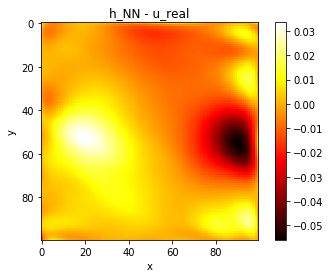

In [25]:
plt.imshow(u-u_real, cmap=cm.hot)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('h_NN - u_real')
my_x_ticks = np.arange(-1, 1, 0.1)
my_y_ticks = np.arange(-1, 1, 0.1)

Text(0.5, 0, 'y')

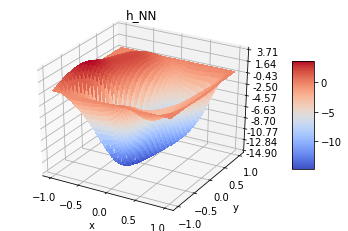

In [16]:
plot_3D(X,Y,u-u_real)
plt.title('h_NN')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, '$log_{10}(loss)$')

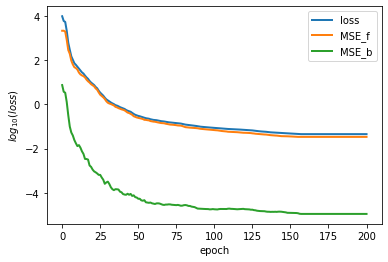

In [65]:
plt.plot(np.log10(loss_path['sum']),label='loss',linewidth=2)
plt.plot(np.log10(loss_path['int']),label='MSE_f',linewidth=2)
plt.plot(np.log10(loss_path['bc']),label='MSE_b',linewidth=2)
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel(r'$log_{10}(loss)$')

Text(0, 0.5, '$log_{10}(loss)$')

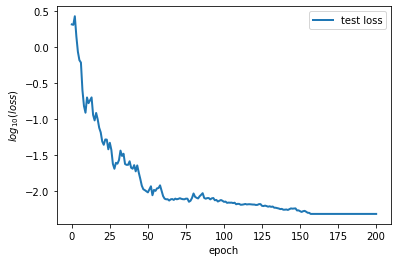

In [64]:
plt.plot(np.log10(loss_path['test']),label='test loss',linewidth=2)
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel(r'$log_{10}(loss)$')

In [23]:
0.0032/1.6266

0.0019672937415467846

In [ ]:
# 新的想法：
# 1.分而治之，先找一个网络专门拟合边界条件然后再化为齐次边界条件求解
# 2.更多求解的例子：
#   (1)复杂的区域，更高的维度
#   (2)求解的方程形式：椭圆，双曲，色散
#   (3)多尺度傅里叶特征
